# 線性幾何（Linear Geometry）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

## 向量與點線面

### 點
空間的一個點  
以及空間中的一個向量  
都是由一組數對來表示

$(1,2,3)$ 可以表示一個點  
也可以表示起點在原點、終點在 $(1,2,3)$ 的一個向量

比如說  
$(1,2,3) + (3,2,1)$  
可以解釋成：
1. 從點 $(1,2,3)$ 往 $(3,2,1)$ 的方向移動，或是
2. 向量 $(1,2,3)$ 和向量 $(3,2,1)$ 相加  

結果是一樣的，但可以有不同的解釋法

### 線
向量也可以代表一個線段  

比如說向量 $(1,2)$  
可以代表 $(0,0)$ 到 $(1,2)$ 的這個線段  
而這個線段的長度為 $\sqrt{1^2 + 2^2} = \sqrt{5}$

In [25]:
v = vector([1,2])
v.norm()

sqrt(5)

一般來說  
向量 ${\bf v} = (a_1,\ldots,a_n)$ 的**長度**定為  
$|{\bf v}| = \sqrt{a_1^2 + \cdots + a_n^2}$

In [27]:
l = [1,2,3,4,5]
print(sqrt(sum(k^2 for k in l)))
print(vector(l).norm())

sqrt(55)
sqrt(55)


長度有以下的性質：
1. $|{\bf v}|\geq 0$
2. $|{\bf v}| = 0$ if and only if ${\bf v} = (0,\ldots,0)$
3. $|{\bf v}| = \sqrt{{\bf v}\cdot{\bf v}}$
4. $|{\bf u} + {\bf v}|^2 = |{\bf u}|^2 + {\bf u}\cdot{\bf v} + {\bf v}\cdot{\bf u} + |{\bf v}|^2$  
   若 ${\bf u}$ 和 ${\bf v}$ 都是實數的向量，則 ${\bf u}\cdot{\bf v} = {\bf v}\cdot{\bf u}$

來測試一下

In [32]:
u = vector([1,2,3])
v = vector([3,2,1])
w = u + v
print("|u + v|^2 = %s"%(w.norm()^2))
print("|u|^2 = %s"%(u.norm()^2))
print("u dot v = %s, v dot u = %s"%(u.dot_product(v), v.dot_product(u)))
print("|v|^2 = %s"%(v.norm()^2))

|u + v|^2 = 48
|u|^2 = 14
u dot v = 10, v dot u = 10
|v|^2 = 14


若 ${\bf u} = (a_1,\ldots,a_n)$  
和 ${\bf v} = (b_1,\ldots,b_n)$
為空間中兩點  
則兩點之間的矩離為  
$\sqrt{(a_1-b_1)^2 + \cdots (a_n-b_n)^2}$  
剛好也就是 ${\bf u} - {\bf v}$ 的長度 $|{\bf u} - {\bf v}|$

所以在儘管在高維度裡  
我們還是知道  
${\bf u} = (2,2,1,1,1,1)$  
${\bf v} = (1,1,2,2,1,1)$  
${\bf w} = (1,1,1,1,2,2)$  
是一個正三角形的三個頂點

In [35]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,2,2,1,1])
w = vector([1,1,1,1,2,2])
print('|u - v|^2 = %s'%(u-v).norm()^2)
print('|v - w|^2 = %s'%(v-w).norm()^2)
print('|w - u|^2 = %s'%(w-u).norm()^2)

|u - v|^2 = 4
|v - w|^2 = 4
|w - u|^2 = 4


而  
${\bf u} = (2,2,1,1,1,1)$  
${\bf v} = (1,1,1,1,1,1)$  
${\bf w} = (1,1,1,1,2,2)$  
是一個等腰直角三角形的三個頂點

In [36]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,1,1,1,1])
w = vector([1,1,1,1,2,2])
print('|u - v|^2 = %s'%(u-v).norm()^2)
print('|v - w|^2 = %s'%(v-w).norm()^2)
print('|w - u|^2 = %s'%(w-u).norm()^2)

|u - v|^2 = 2
|v - w|^2 = 2
|w - u|^2 = 4


#### 餘絃定理
若一三角形的三邊長為 $a$, $b$, $c$  
且 $a$, $b$ 兩邊的夾角為 $\theta$  
則 $a^2 + b^2 - 2ab\cos\theta = c^2$

當 $\theta = 90^\circ$ 時  
$\cos\theta = 0$ 而餘絃定理可以推導出畢氏定理

更重要的是  
只要知道三邊長  
我們就知道夾角的大小  
$\cos\theta = \frac{a^2 + b^2 - c^2}{2ab}$

因此在高維度中  
我們也可以算出 $\overline{{\bf v}{\bf u}}$ 和 $\overline{{\bf v}{\bf w}}$ 的夾角 $\theta$ 為  
$\cos\theta = \frac{|{\bf u} - {\bf v}|^2 + |{\bf w} - {\bf v}|^2 - |{\bf u} - {\bf w}|^2}{2|{\bf u} - {\bf v}||{\bf w} - {\bf v}|}$

正三角形夾角為 $\theta = 60^\circ$  
$\cos\theta = 1/2$

In [39]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,2,2,1,1])
w = vector([1,1,1,1,2,2])
a = (u-v).norm()
b = (w-v).norm()
c = (u-w).norm()
print('a = |u - v| = %s'%(u-v).norm())
print('b = |w - v| = %s'%(w-v).norm())
print('c = |u - w| = %s'%(u-w).norm())
print('cos theta = %s'%((a^2 + b^2 - c^2)/2/a/b))

a = |u - v| = 2
b = |w - v| = 2
c = |u - w| = 2
cos theta = 1/2


等腰直角三角形的直角夾角為 $\theta = 90^\circ$  
$\cos\theta = 0$

In [40]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,1,1,1,1])
w = vector([1,1,1,1,2,2])
a = (u-v).norm()
b = (w-v).norm()
c = (u-w).norm()
print('a = |u - v| = %s'%(u-v).norm())
print('b = |w - v| = %s'%(w-v).norm())
print('c = |u - w| = %s'%(u-w).norm())
print('cos theta = %s'%((a^2 + b^2 - c^2)/2/a/b))

a = |u - v| = sqrt(2)
b = |w - v| = sqrt(2)
c = |u - w| = 2
cos theta = 0


## 三角不等式、柯西不等式

## 向量

### 二維向量
一個向量記錄了方向以及距離  
它是一個把物體移動的過程

在二維平面中  
$(a,b)$ 可以代表一個點  
也可以代表一個向量  
這個向量可以把物體從 $(0,0)$ 移動到 $(a,b)$  
所以這向量的長度（或是距離）為 $a^2+b^2$

在 Sage 裡  
可以用 `vector([a,b])` 來建造一個向量 $(a,b)$

In [76]:
v1 = vector([2,3])

函數 `f` 的 `f.plot()` 會把函數繪製出來  
向量 `v` 的 `v.plot()` 同樣會把向量繪製出來  

不同類型的物件會畫出不同東西

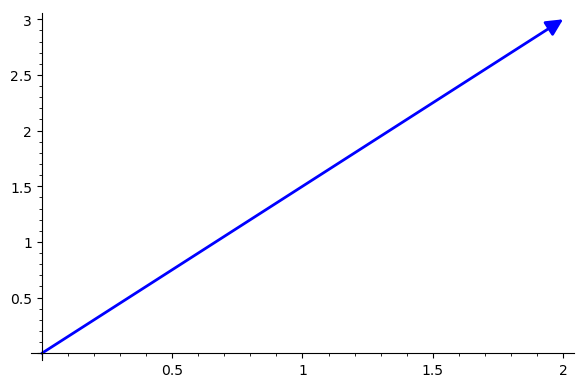

In [78]:
v1.plot()

我們只在意向量的方向及距離  
並不在意它的起始點在哪邊  

所以下方的藍向量與紅向量是被視為一樣的

可以用 `start` 參數  
來調整繪製時的起始點

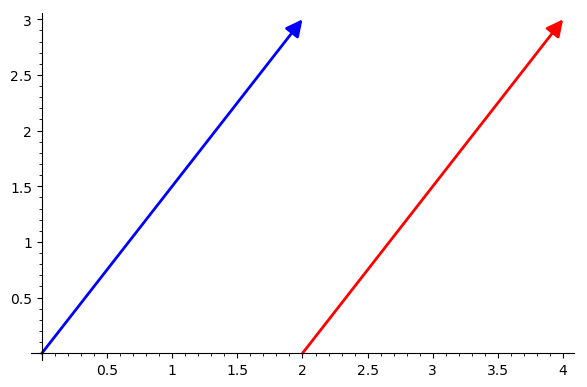

In [133]:
v1 = vector([2,3])
pic1 = v1.plot(color='blue')
pic2 = v1.plot(start=(2,0), color='red')
pic1 + pic2

向量有**向量加法**：  
向量加向量就是把各項相加  
$(a,b)+(c,d)=(a+c,b+d)$

In [79]:
v1 = vector([2,3])
v2 = vector([-1,-1])
v3 = v1 + v2
v3

(1, 2)

意思是  
把一點從原點用 $(a,b)$ 向量移動  
再用 $(c,d)$ 向量移動  

相當於直接用 $(a+c,b+d)$ 來移動

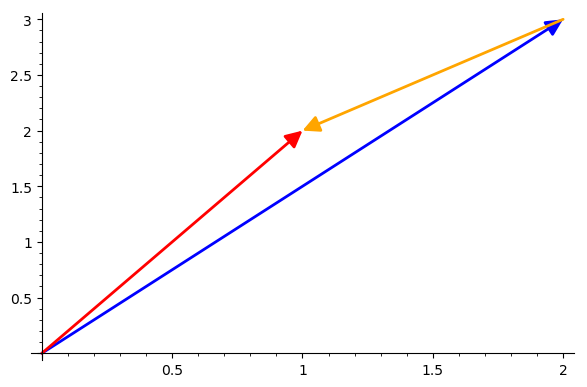

In [83]:
v1 = vector([2,3])
v2 = vector([-1,-1])
v3 = v1 + v2
pic1 = v1.plot(color='blue')
pic2 = v2.plot(color='orange', start=v1)
pic3 = v3.plot(color='red')
pic1 + pic2 + pic3

向量有**純量乘法**：  
純量和向量相乘就是把純量乘進每一項    
$k\times (a,b)=(ka,kb)$

In [80]:
v1 = vector([2,3])
3 * v1

(6, 9)

意思就是將這個向量伸縮 $k$ 倍

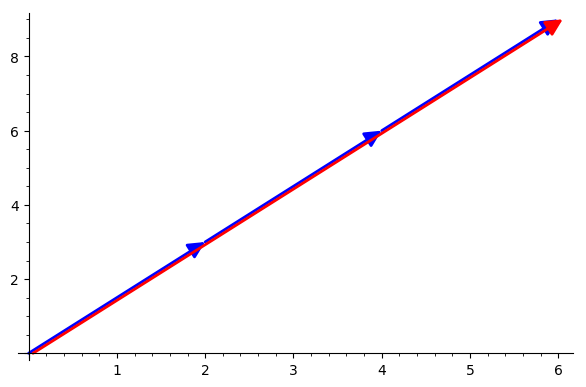

In [82]:
v1 = vector([2,3])
v2 = 3 * v1
pic1 = v1.plot()
pic2 = v1.plot(start=v1)
pic3 = v1.plot(start=v1+v1)
pic4 = v2.plot(start=(0.05,0),color='red')
pic1 + pic2 + pic3 + pic4

向量和向量之間可以做**內積**（dot product）  
得到一個純量  
$(a,b)\cdot (c,d) = ac+bd$

In [84]:
v1 = vector([2,3])
v2 = vector([-1,-1])
v1 * v2

-5

### 高維度向量
一個 $n$ 個數字的數對  
$(a_1, \ldots, a_n)$  
叫作一個 **$n$ 維向量**  

In [1]:
v1 = vector([1,2,3,4,5])

如同二維向量一般  
兩個高維度的向量可以**相加**  
$(a_1, \ldots, a_n) + (b_1, \ldots, b_n) = (a_1+b_1, \ldots, a_n+b_n)$

In [2]:
v1 = vector([1,2,3,4,5])
v2 = vector([5,4,3,2,1])
v1 + v2

(6, 6, 6, 6, 6)

純量和向量可以做**純量乘法**  
$k\times (a_1, \ldots, a_n)=(ka_1, \ldots, ka_n)$

In [3]:
v1 = vector([1,2,3,4,5])
3 * v1

(3, 6, 9, 12, 15)

向量和向量可以做**內積**  
得到一個純量  
$(a_1, \ldots, a_n)\cdot (b_1, \ldots, b_n) = a_1b_1 + \cdots + a_nb_n$

In [4]:
v1 = vector([1,2,3,4,5])
v2 = vector([5,4,3,2,1])
v1 * v2

35

## Python 中的物件
在 Python 裡  
我們可以創造出全新的東西  
然後定義它的許多性質及相關函數  
甚至定義它們的加法  
如何比大小  
如何顯示出來  

因為它是一個幾乎沒有侷限的東西  
所以我們叫它作**物件**

### 類別
Python 裡的物件有各自的**資料結構**（type）  
或是它屬於某一個**類別**（class）  

In [85]:
type(1)

<type 'sage.rings.integer.Integer'>

In [86]:
type(1.5)

<type 'sage.rings.real_mpfr.RealLiteral'>

In [87]:
type(x)

<type 'sage.symbolic.expression.Expression'>

In [88]:
type(range)

<type 'builtin_function_or_method'>

In [89]:
type(matrix([[1]]))

<type 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'>

In [90]:
type(QQ)

<class 'sage.rings.rational_field.RationalField_with_category'>

In [91]:
type(exp)

<class 'sage.functions.log.Function_exp'>

物件可以是一個類別裡的**實例**（instance）  
可以用 `isinstance` 來判斷一個物件屬不屬於某一類別

In [92]:
isinstance(1,Integer)

True

In [94]:
isinstance(1,int)

False

In [93]:
isinstance(x,Expression)

True

### 自行定義一個類別
接下來  
我們試著在 Sage 中  
定義一個新的類別叫作 `fraction`  
來實現數學中的分數  

`class fraction`  
定義了類別的名稱

`__init__`  
定義了如何創造一個新物件

一個分數其實只須要兩個輸入的值：  
分子（numerator）和分母（denominator）  

每個物件都可以設定許多**屬性**（attribute）  
像這裡我們設定了 `numerator`、`denominator`、以及 `gcd`  

當 `q` 是一個物件  
`gcd` 是它的屬性  
可以用 `q.gcd` 叫出這個屬性的值

In [95]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
q = fraction(4,6)
q.gcd

2

每個物件也可以定義其相關的函數  
叫作**運算**（method）  

這裡我們定義一個新的運算  
計算分數的倒數（reciprocal）

In [96]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

q = fraction(2,3)
print 'q'
print q.numerator
print q.denominator
print '---'

p = q.reciprocal();
print '1/q'
print p.numerator
print p.denominator

q
2
3
---
1/q
3
2


運算是函數  
所以最後要用 `()` 收尾  
或是放入一些須要的參數  

屬性只是一個值  
所以不用用 `()` 收尾

In [97]:
q.numerator()

TypeError: 'sage.rings.integer.Integer' object is not callable

In [98]:
q.reciprocal

<bound method fraction.reciprocal of <__main__.fraction instance at 0x7f8e15e09bd8>>

這邊附帶提一下  
`_` 並不是什麼特殊的字元  
它可以拿來當變數的名字

In [99]:
for _ in range(10):
    print _

0
1
2
3
4
5
6
7
8
9


Python 中的類別人有許多特殊的運算（special method）  
像是 `__init__`、`__repr__`、`__add__`、以及 `__contain__`

`__repr__` 告訴 Python  
如何把這個物件 `print` 出來  
（賦予 `print` 的意義）

In [100]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

    def __repr__(self):
        return "{} / {}".format(self.numerator,self.denominator)

q = fraction(2,3)
print q

2 / 3


`__add__` 告訴 Python  
如何將兩個物件相加  
（賦予 `+` 的意義）
 
類似的還有：  
`__sub__` 定義了減法 `-`  
`__mul__` 定義了乘法 `*`  
`__div__` 定義了除法 `/`  

In [102]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

    def __repr__(self):
        return "{} / {}".format(self.numerator,self.denominator)

    def __add__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return fraction( a*d + b*c, b*d )

q = fraction(2,3)
p = fraction(2,5)
print p, '+', q, '=', p+q

2 / 5 + 2 / 3 = 16 / 15


`__eq__` 告訴 Python  
如何判斷兩個物件是否一樣  
（賦予 `==` 意義）

類似的還有  
`__ne__` 定義了不等於 `!=`

In [103]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

    def __repr__(self):
        return "{} / {}".format(self.numerator,self.denominator)

    def __add__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return fraction( a*d + b*c, b*d)

    def __eq__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return a*d == b*c

q = fraction(2,3)
print q
p = fraction(4,6)
print p
print p == q

2 / 3
4 / 6
True


最後  
我們可以用 `dir`  
來查找所有的屬性及運算  

In [46]:
dir(q)

['__add__',
 '__doc__',
 '__eq__',
 '__init__',
 '__module__',
 '__repr__',
 'denominator',
 'gcd',
 'numerator',
 'reciprocal']

或是用 `vars` 來列出所有的屬性

In [106]:
vars(q)

{'denominator': 3, 'gcd': 1, 'numerator': 2}

這樣我們的 `fraction` 已經很完整了  

然而我們可以留心一些小細節  
讓它更臻完美

比如說加入一些偵錯的機制  

若是分母可以為 0  
程式不見得會出錯  
然後結果不見得是我們要的  

In [107]:
q = fraction(2,0)
print q
p = fraction(3,0)
print p
print p == q

2 / 0
3 / 0
True


所以可以用 `raise Error` 來偵錯

不同的 `Error` 形式  
可以在 [Python 說明書](https://docs.python.org/3/library/exceptions.html)中找到

In [ ]:
class fraction:
    def __init__(self,a,b):
        if b == 0:
            raise ValueError, "The divisor cannot be zero."
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

    def __repr__(self):
        return "{} / {}".format(self.numerator,self.denominator)

    def __add__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return fraction( a*d + b*c, b*d)

    def __eq__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return a*d == b*c

q = fraction(2,0)
print q

## 動手試試看

##### 練習
若 $v_1 = (3,5)$ 且 $v_2 = (-2,-4)$。  
計算 $10 v_1 + 5 v_2$。

In [ ]:
### your answer here

##### 練習
若 $v_1 = (3,5)$ 且 $v_2 = (-2,-4)$。  
計算 $(10 v_1)\cdot(5 v_2)$。

In [ ]:
### your answer here

##### 練習
Python 在定義類別的時候還有許多特殊運算：  
`__le__` 定義小於等於 `<=`、  
`__lt__` 定義小於 `<`、  
`__ge__` 定義大於等於 `>=`、  
`__gt__` 定義大於 `>`。  

將這些特殊運算補到我們先前所定義的 `fraction` 之中。

In [ ]:
### your answer here

##### 練習
定義一個新的類別 `clock_time`：  
輸入時可以放入一個整數 `n`，  
`print` 的時候會印出 1 到 12 中  
和 `n` 差 12 的倍數的那個數字。  
並定義其加法為  
`clock_time(a) + clock_time(b) = clock_time(a+b)`。  

七點鐘再過八個小時會是幾點鐘？

In [ ]:
### your answer here